<a href="https://colab.research.google.com/github/tuhinbasu/Netflix_EDA_Analysis/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Netflix.csv")
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


# Exploratory Data Analysis (EDA)

In [130]:
df.shape

(7100, 10)

In [131]:
# Removing Duplicates (if any)
df.drop_duplicates()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [132]:
# Dataframe Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [133]:
# Checking for total null values
df.isnull().sum()

,0
As of,0
Rank,0
Year to Date Rank,0
Last Week Rank,0
Title,0
Type,0
Netflix Exclusive,2501
Netflix Release Date,0
Days In Top 10,0
Viewership Score,0


In [134]:
# Changing the column names for readability and feasibility
df.rename(columns ={"As of":"As_Of",
                    "Rank":"Current_Rank",
                    "Year to Date Rank":"YTD",
                    "Last Week Rank":"Last_Week_Rank",
                    "Netflix Exclusive":"Is_Exclusive",
                    "Netflix Release Date":"Platform_Debut",
                    "Days In Top 10":"Days_Seeded",
                    "Viewership Score":"Viewership_Score"}, inplace = True)
df.head()

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [135]:
# Fixing the two Dates column - Till_Date and Platform_Debut [datatype and conversion] for analysis
df[["As_Of", "Platform_Debut"]] = df[["As_Of","Platform_Debut"]].apply(lambda x: pd.to_datetime(x))
df.head()

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [136]:
df.Type.unique()

array(['TV Show', 'Movie', 'Stand-Up Comedy', 'Concert/Perf…'],
      dtype=object)

In [137]:
df[df["Type"] =="Concert/Perf…"]

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
2651,2020-12-22,2,-,-,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,1,9
2664,2020-12-23,5,2,-,"Ariana Grande: Excuse Me, I…",Concert/Perf…,Yes,2020-12-21,2,15


In [138]:
# Replacing the special characters present and removing extra spaces at leading and trailing from Title (if any)
df["Title"] = df["Title"].apply(lambda x: x.replace("â","").strip())
df["Type"] = df["Type"].apply(lambda x: x.replace("Concert/Perf…","Concert/Performance").strip())

df.head()

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [139]:
# Checking for categories in tIs_Exclusive columnhe
df["Is_Exclusive"].unique()

array(['Yes', nan], dtype=object)

In [140]:
# Fill Null values with "No"
df["Is_Exclusive"] = df["Is_Exclusive"].fillna("No")

In [141]:
# Checking the changes made
df[df["Is_Exclusive"] == "No"]

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30
8,2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11
12,2020-04-02,3,3,2,All American,TV Show,No,2019-03-28,10,84
15,2020-04-02,6,4,-,Blood Father,Movie,No,2020-03-26,6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,No,2016-07-10,13,62
7092,2022-03-11,3,3,-,Good Girls,TV Show,No,2019-01-01,26,149
7097,2022-03-11,8,8,-,Shooter,Movie,No,2014-08-01,3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,2022-03-01,10,33


In [142]:
# 3968 rows where we are missing Last_Week_Rank
df[df["Last_Week_Rank"] == "-"]

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45
3,2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,2020-03-26,2,5
8,2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,No,2016-07-10,13,62
7091,2022-03-11,2,1,-,Pieces of Her,TV Show,Yes,2022-03-04,7,68
7092,2022-03-11,3,3,-,Good Girls,TV Show,No,2019-01-01,26,149
7097,2022-03-11,8,8,-,Shooter,Movie,No,2014-08-01,3,7


In [143]:
# YTD column also had "-"
df[df["YTD"] == "-"]

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
13,2020-04-02,4,-,-,Nailed It!,TV Show,Yes,2018-03-09,1,7
14,2020-04-02,5,-,-,How to Fix a Drug Scandal,TV Show,Yes,2020-04-01,1,6
16,2020-04-02,7,-,-,The Roommate,Movie,No,2020-04-01,1,4
27,2020-04-03,8,-,-,The Players Club,Movie,No,2020-04-01,1,3
28,2020-04-03,9,-,-,Salt,Movie,No,2020-04-01,1,2
...,...,...,...,...,...,...,...,...,...,...
7039,2022-03-05,10,-,-,Shrek,Movie,No,2018-05-01,1,1
7049,2022-03-06,10,-,-,Just Like Heaven,Movie,No,2022-03-01,3,7
7064,2022-03-08,5,-,-,Good Girls,TV Show,No,2019-01-01,23,124
7079,2022-03-09,10,-,-,Shooter,Movie,No,2014-08-01,1,1


In [144]:
# Replaced "-" with "0"
df["Last_Week_Rank"] = df["Last_Week_Rank"].apply(lambda x: x.replace("-","0"))
df["YTD"] = df["YTD"].apply(lambda x: x.replace("-","0"))
df.head()

,As_Of,Current_Rank,YTD,Last_Week_Rank,Title,Type,Is_Exclusive,Platform_Debut,Days_Seeded,Viewership_Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,No,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55


In [145]:
# Converting the the numeric columns from string to integers
df[["Current_Rank","YTD","Last_Week_Rank"]] = df[["Current_Rank","YTD","Last_Week_Rank"]].apply(lambda x: pd.to_numeric(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   As_Of             7100 non-null   datetime64[ns]
 1   Current_Rank      7100 non-null   int64         
 2   YTD               7100 non-null   int64         
 3   Last_Week_Rank    7100 non-null   int64         
 4   Title             7100 non-null   object        
 5   Type              7100 non-null   object        
 6   Is_Exclusive      7100 non-null   object        
 7   Platform_Debut    7100 non-null   datetime64[ns]
 8   Days_Seeded       7100 non-null   int64         
 9   Viewership_Score  7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


# Correlation Analysis
Analyzing the correlation among the specified columns: [Current_Rank, YTD, Last_Week_Rank, Days_Seeded, and Viewership_Score]. The correlation analysis helps identify the strength and direction of relationships among these variables:

* Closer to 1: Indicates a strong positive linear relationship.
* Closer to 0: Indicates little to no relationship.
* Closer to -1: Indicates a strong negative linear relationship.

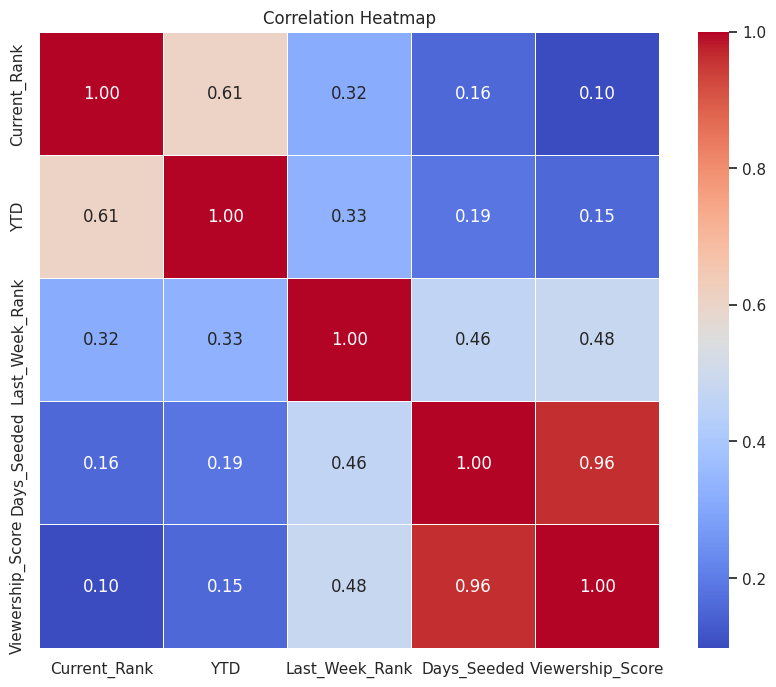

In [146]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cor_matrix = df[["Current_Rank","YTD","Last_Week_Rank","Days_Seeded","Viewership_Score"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Viewership Score')

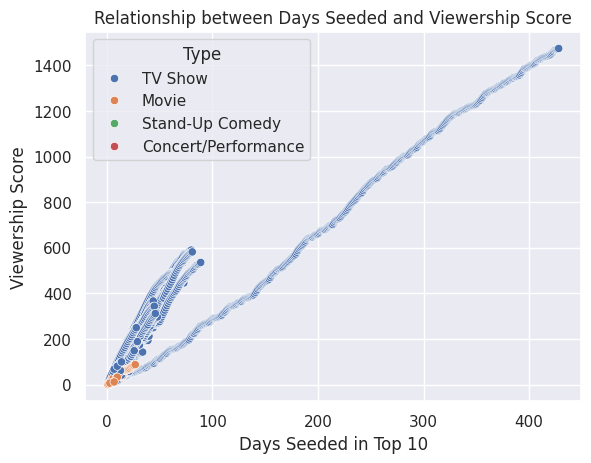

In [147]:
# Visualizing the positive colinear relationship with scatter plot
sns.scatterplot(x="Days_Seeded",y="Viewership_Score", data = df, hue="Type")
plt.title("Relationship between Days Seeded and Viewership Score")
plt.xlabel("Days Seeded in Top 10")
plt.ylabel("Viewership Score")

# Average Viewership Analysis</br>
Let’s analyze how title types are performing in terms of average viewership scores:

1. Analyze the overall average viewership score compared to title types.
2. Analyze the average viewership score for exclusive content produced by Netflix.
3. Analyze the average viewership score for non-exclusive content on Netflix.

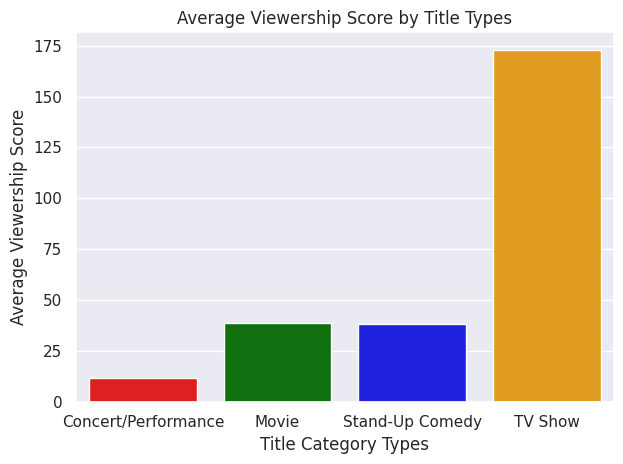

In [148]:
#Analysis of overall average viewership score compared with title type.
typedata_all = df.groupby("Type")["Viewership_Score"].mean().reset_index()  # Reset index to create a DataFrame
sns.barplot(x="Type", y="Viewership_Score", data= typedata_all, hue="Type", palette=["red", "green", "blue", "orange"])
plt.xlabel("Title Category Types")
plt.ylabel("Average Viewership Score")
plt.title("Average Viewership Score by Title Types")
plt.tight_layout()

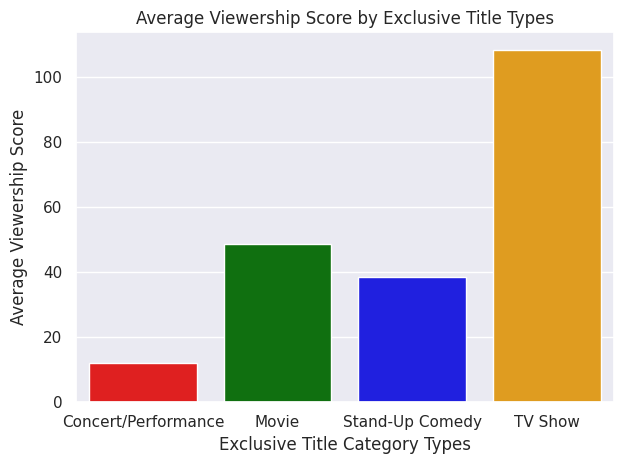

In [149]:
#Analysis of average viewership score for exclusive content by netflix.
typedata_ex = df[df["Is_Exclusive"] == "Yes"]
typedata_exclusive = typedata_ex.groupby("Type")["Viewership_Score"].mean().reset_index()
sns.barplot(x="Type", y="Viewership_Score", data= typedata_exclusive, hue="Type", palette=["red", "green", "blue", "orange"])
plt.xlabel("Exclusive Title Category Types")
plt.ylabel("Average Viewership Score")
plt.title("Average Viewership Score by Exclusive Title Types")
plt.tight_layout()

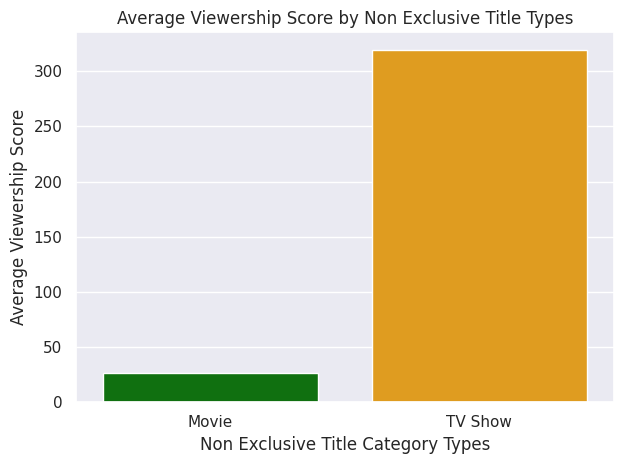

In [150]:
#Analysis of average viewership score for non-exclusive contnet by netflix.
typedata_ex_no = df[df["Is_Exclusive"] == "No"]
typedata_exclusive_no = typedata_ex_no.groupby("Type")["Viewership_Score"].mean().reset_index() # No Stand Up Comedy or Concert Performance in Non Exclusive
sns.barplot(x="Type", y="Viewership_Score", data= typedata_exclusive_no, hue="Type", palette=["green", "orange"])
plt.xlabel("Non Exclusive Title Category Types")
plt.ylabel("Average Viewership Score")
plt.title("Average Viewership Score by Non Exclusive Title Types")
plt.tight_layout()

Analysing the content performance with respect to their exclusivity.<br>
It seems the non-exclusive TV Shows perform better than the TV Shows produced by Netflix.

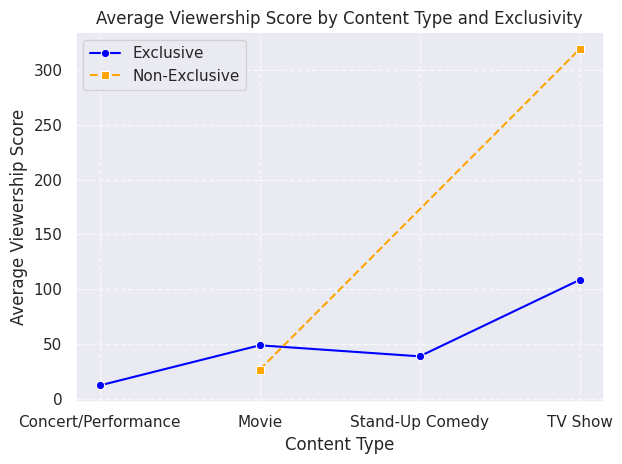

In [151]:
# Average Viewership Score by Content Type and Exclusivity
sns.lineplot(data = typedata_exclusive, x = "Type", y = "Viewership_Score",marker="o", linestyle="-", color="blue", label ="Exclusive")
sns.lineplot(data = typedata_exclusive_no,  x = "Type", y = "Viewership_Score",marker="s", linestyle="--", color="orange",  label ="Non-Exclusive")
plt.title("Average Viewership Score by Content Type and Exclusivity")
plt.xlabel("Content Type")
plt.ylabel("Average Viewership Score")
#plt.xticks(rotation=45, ha="right")

# Add grid lines for better data interpretation
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Exclusive Vs. Non-Exclusive Content Count</br>
Analysis on how many content are exclusively produced by the Netflix and how many are Non-Exclusive

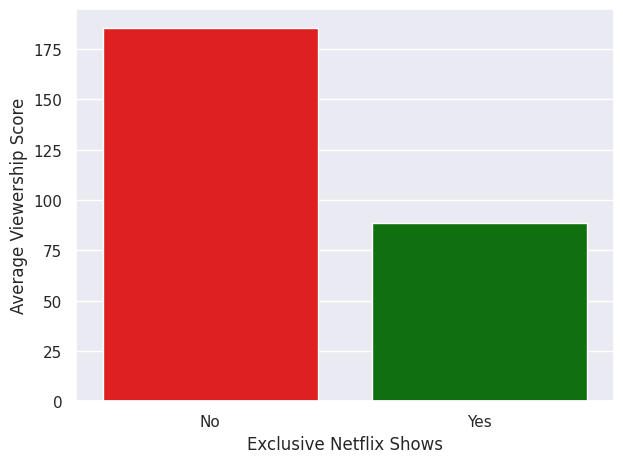

In [152]:
g = df.groupby("Is_Exclusive")["Viewership_Score"].mean().reset_index()
sns.barplot(x="Is_Exclusive", y="Viewership_Score", data=g, hue="Is_Exclusive", palette=["red", "green"])
plt.xlabel("Exclusive Netflix Shows")
plt.ylabel("Average Viewership Score")
plt.tight_layout()

# Exclusive Content Analysis</br>
Let’s analyze the exclusive content produced by Netflix:

1. Count all the exclusive content in each type.
2. Identify the top 10 TV shows produced by Netflix.
3. Identify the top 10 movies produced by Netflix.
4. Identify the top 10 stand-up comedy shows produced by Netflix.

The contents are ranked based on the Days Seeded parameter. The Days Seeded metric describes the performance of content by indicating how many days it remained in the top 10 rankings.

Count all the exclusive content in each type.

In [153]:
content_data = df[df["Is_Exclusive"]=="Yes"]
content = content_data.groupby("Type")["Title"].count().sort_values(ascending = False)
content.reset_index()

,Type,Title
0,TV Show,3087
1,Movie,1469
2,Stand-Up Comedy,41
3,Concert/Performance,2


Top 10 TV Shows produced by Netflix.

In [154]:
tvshows_data = df[(df["Type"] == "TV Show") & (df["Is_Exclusive"] == "Yes")]
tvshows = tvshows_data.groupby("Title")["Days_Seeded"].max().sort_values(ascending = False)
df_tvshows = pd.DataFrame(tvshows[:10]).reset_index()
df_tvshows

,Title,Days_Seeded
0,Ozark,89
1,The Queens Gambit,73
2,Outer Banks,72
3,Squid Game,66
4,Bridgerton,58
5,Virgin River,55
6,Maid,49
7,Emily in Paris,48
8,Too Hot to Handle,48
9,Love is Blind,46


Top 10 Movies produced by Netflix.

In [155]:
movies_data = df[(df["Type"]=="Movie") & (df["Is_Exclusive"] == "Yes")]
movies = movies_data.groupby("Title")["Days_Seeded"].max().sort_values(ascending=False)
df_movies = pd.DataFrame(movies[:10]).reset_index()
df_movies

,Title,Days_Seeded
0,The Mitchells vs. The Machines,31
1,Vivo,29
2,365 Days,28
3,Dont Look Up,26
4,We Can Be Heroes,24
5,The Christmas Chronicles 2,24
6,Red Notice,23
7,The Unforgivable,22
8,Wish Dragon,21
9,Back to the Outback,20


Top 10 Stand-Up Comedy shows produced by Netflix.

In [156]:
stand_up_data = df[(df["Type"]=="Stand-Up Comedy") & (df["Is_Exclusive"] == "Yes")]
stand_up = stand_up_data.groupby("Title")["Days_Seeded"].max().sort_values(ascending=False)
df_standup = pd.DataFrame(stand_up[:10]).reset_index()
df_standup

,Title,Days_Seeded
0,Dave Chappelle: The Closer,16
1,Kevin Hart: Zero F**ks Given,10
2,George Lopez: Well Do It f…,5
3,Jerry Seinfeld: 23 Hours to…,5
4,Chris DElia: No Pain,3
5,Bo Burnham: Inside,2


# Conclusion<br>

1. An increase in viewership scores ensures that content ranks in the top 10.
Overall, TV shows on Netflix are much more popular compared to other types of content.
2. The trend is similar for exclusive and non-exclusive TV shows, which remain popular. Netflix does not host non-exclusive Concert/Performance or Stand-Up Comedy content on its platform (or this data is missing).
3. Non-exclusive TV shows perform better than TV shows produced by Netflix.
4. Netflix hosts more non-exclusive content than exclusive content on its platform.
5. Among the exclusive content:
TV Show: Ozark
Movie: The Mitchells vs. The Machines
Stand-Up Comedy: Dave Chappelle: The Closer
have performed exceptionally well and remained top-seeded for a long time, respectively.
